In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#textual data to numerical data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection and Pre-Processing

In [2]:
data = pd.read_csv("mail_data.csv")

In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# replace the null values with the null string
mail_data = data.where((pd.notnull(data)),'')

In [6]:
mail_data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#checking the size of the dataset
mail_data.shape

(5572, 2)

### Data Visualization

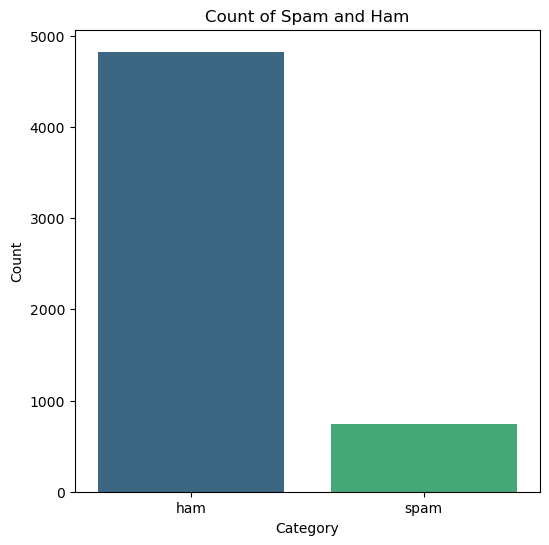

In [8]:
label_counts = data['Category'].value_counts()


plt.figure(figsize=(6, 6))
sns.countplot(x='Category', data=data, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Spam and Ham')
plt.show()

### Label Encoding 

In [40]:
#label spam mail as 0 , ham mail as 1
mail_data.loc[mail_data['Category'] == 'spam','Category'] = 0
mail_data.loc[mail_data['Category'] == 'ham','Category'] = 1

In [41]:
mail_data.head(5)

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
# separating the data as texts and labels

X = mail_data['Message']

Y = mail_data['Category']

In [43]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [44]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


### Train-Test Split

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 3)

In [46]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


### Feature Extraction

In [47]:
# transform th test data to feature vectors that can be used as input to the logistic regression model

feature_extraction = TfidfVectorizer(min_df = 1,stop_words = 'english',lowercase=True)

In [48]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

#convert Y_train and Y_test values into integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [49]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

### Training the Model

#### Logistic Regression

In [50]:
model = LogisticRegression()

In [51]:
model.fit(X_train_features,Y_train)

LogisticRegression()

**Evaluating the trained model**

In [52]:
#prediction on training data

prediction = model.predict(X_train_features)
accuracy = accuracy_score(Y_train,prediction)

In [53]:
print("Accuracy on training data : ",accuracy)

Accuracy on training data :  0.9670181736594121


In [54]:
#prediction on testing data

prediction_test_data = model.predict(X_test_features)
accuracy_test_data = accuracy_score(Y_test,prediction_test_data)

In [55]:
print("Accuracy on test data : ",accuracy_test_data)

Accuracy on test data :  0.9659192825112107


### Building a Predictive System

In [56]:
input_mail = ["FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv"]

#convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

#making predictions
prediction = model.predict(input_data_features)
print(prediction)

if prediction[0]==1:
    print('Ham mail')
else:
    print('Spam mail')

[1]
Ham mail
